In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(13)

## Generating Points

In [3]:
points_x = np.random.random(size = 1000)
points_y = 1.5 * points_x + np.random.normal(0, 0.3, 1000)

In [4]:
x_train = points_x[:800]
x_test = points_x[-200:]

y_train = points_y[:800]
y_test = points_y[-200:]

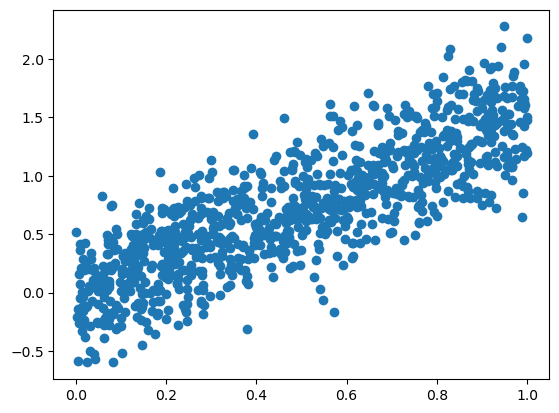

In [5]:
plt.scatter(points_x, points_y)

In [6]:
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)

num = (x_train - x_mean)*(y_train - y_mean)
den = (x_train - x_mean)*(x_train - x_mean)

slope = num.sum() / den.sum()

intercept = y_mean - slope * x_mean

In [7]:
y_pred = x_test * slope + intercept

In [8]:
print(slope, intercept)

1.5296073167245943 -0.017959332005032413


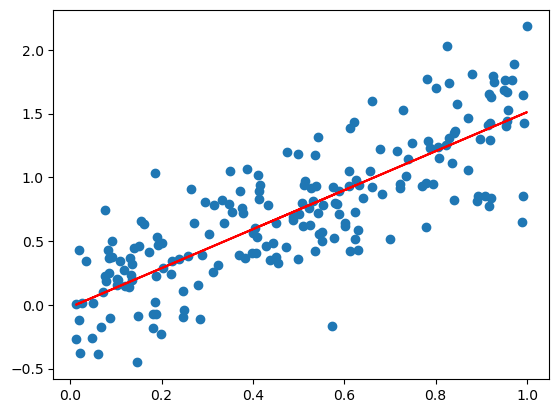

In [9]:
plt.plot(x_test, y_pred, c='red')
plt.scatter(x_test, y_test)

## Gradient Descent

In [10]:
slope = 0
intercept = 0

l_rate = 0.1
iters = 100

for i in range(iters):
    y_pred = slope * x_train + intercept
    error = (y_train - y_pred)

    slope_grad = (-2/len(x_train)) * np.sum(x_train * error)
    
    inter_grad = (-2/len(x_train)) * np.sum(error)
    
    slope = slope - l_rate * slope_grad
    intercept = intercept - l_rate * inter_grad

In [11]:
y_pred = slope * x_test + intercept

In [12]:
print(slope, intercept)

1.2246653097857934 0.1414964297289568


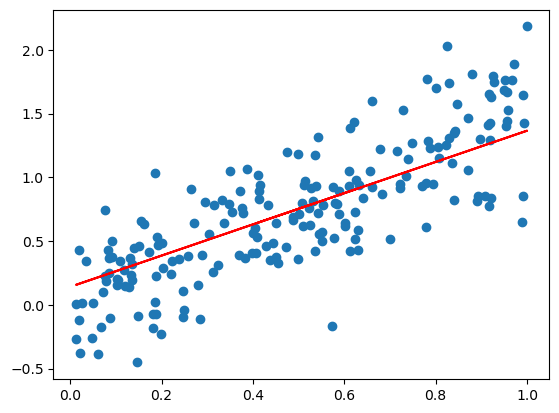

In [13]:
plt.plot(x_test, y_pred, c='red')
plt.scatter(x_test, y_test)

## SKLearn LR

In [14]:
from sklearn.linear_model import LinearRegression

x_train = x_train.reshape(-1,1)
#y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)


lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [15]:
print(lr.coef_, lr.intercept_)

[1.52960732] -0.017959332005032635


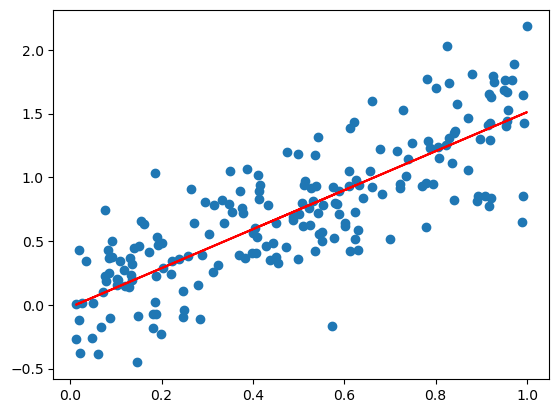

In [16]:
plt.plot(x_test, y_pred_lr, c='red')
plt.scatter(x_test, y_test)

## Inference
#### Note : Learning Rate is 0.1

After 100 iterations of Gradient Descent -> slope, intercept = 1.2246653097857934, 0.1414964297289568 </br>
SKLearn's Model -> slope, intercept = 1.52960732, -0.017959332005032635 </br>
LR Model (own) -> slope, intercept = 1.5296073167245943, -0.017959332005032413

After 1000 iterations of Gradient Descent -> Values are same as SKLearn's

So, 100 iterations are not enough for the Gradient Descent to reach the optimal slope given by SKLearn.